## Operações Básicas - CRUD ( Create, Read, Update e Delete)

É possível **Inserir** dados na tabela, por exemplo:

    INSERT INTO Usuarios(nome, idade, sexo, salario) VALUES ("Joaquim Silva",60,"M",200)
    
É possível **Atualizar** a tabela, por exemplo: 

    UPDATE Usuarios SET salario=2000 WHERE Nome="Joaquim Silva"
    
É possível **Remover** os dados, por exemplo:

    DELETE FROM Usuarios WHERE Nome="Joaquim Silva"
    
É Possível **Consultar** a tabela, por exemplo :

    SELECT * FROM Usuarios

## Tabelas

Dentro de um banco de dados relacionais, os nossos **Dados** estarão dispostos em tabelas( como no exemplo abaixo ) e a partir destas tabelas que iremos extrair nossas **Informações**.

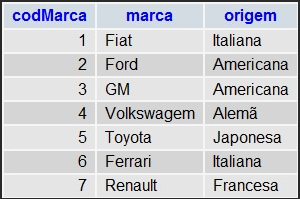

In [2]:
!pip install mysql-connector-python

  Using cached https://files.pythonhosted.org/packages/41/fc/89a139baabc96ef020d112d75b77809b1578d7e9345670a950b1955f3e39/mysql_connector_python-8.0.26-cp37-cp37m-win_amd64.whl


In [1]:
import mysql.connector
import pandas as pd

#Dados do banco de dados db4free

host = 'db4free.net'
port = 3306

user = 'letscodeuser'
password = "letscode123"
database = "letscodedb"

In [128]:
#Exemplo de conexao banco dados e Show Tables
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database, port=port)

cursor = con.cursor()


cursor.execute("SHOW TABLES")

for x in cursor:
    print(x)
 

con.commit()
cursor.close()
con.close()


('colaboradores',)
('departamento_colaborador',)
('departamentos',)
('salarios',)


In [ ]:
# Exemplo de criação de uma tabela colaboradores
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database, port=port)

cursor = con.cursor()

cursor.execute('''CREATE TABLE colaboradores (id_colab INT NOT NULL, 
                                              data_aniversario DATE NOT NULL, 
                                              primeiro_nome  VARCHAR(14) NOT NULL, 
                                              sobrenome VARCHAR(16) NOT NULL, 
                                              sexo ENUM ('M','F') NOT NULL,
                                              data_contratacao DATE NOT NULL, 
                                              PRIMARY KEY (id_colab))''')
con.commit()
con.close()

In [43]:
# Exemplo de criação de uma tabela salário relacionada a tabela colaboradores
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database, port=port)

cursor = con.cursor()

cursor.execute('''CREATE TABLE salarios (
                  id_colab INT NOT NULL,
                  salario  INT NOT NULL,
                  data_inicio DATE NOT NULL,
                  data_fim DATE NULL,
                  FOREIGN KEY (id_colab) REFERENCES colaboradores (id_colab) ON DELETE CASCADE,
                  PRIMARY KEY (id_colab, data_inicio))''')
con.commit()
con.close()



### Inserindo dados

Para inserir dados temos que executar uma query atraves de um cursor (uma estrutura de controle), porém a inserção so é salva no banco após enviarmos um commit.

Como boa prática, sempre devemos fechar as conexoes que abrimos com a nossa base de dados para evitarmos um overhead de conexões com status **OPEN**.

Oberve que ao criamos a query não passamos os valores a serem inseridos diretamente, eles são passados na fução execute, como uma tupla em uma variavel diferente da query.

In [7]:
#Cadastro de um colaborador
con = mysql.connector.connect(user=user,
                              password=password,
                              host=host,
                              database=database)

val = ("12001","1992-05-12","Paulo","Miranda",'M',"2021-01-01")


sql = f'''INSERT INTO colaboradores(id_colab,data_aniversario,primeiro_nome,sobrenome,sexo,data_contratacao) 
VALUES ('{val[0]}','{val[1]}','{val[2]}','{val[3]}','{val[4]}','{val[5]}')'''

print(sql)

#Define cursor
cursor = con.cursor()
#Executa código SQL
cursor.execute(sql)
#Realiza commit
con.commit()
#Fecha a conexão
con.close()

INSERT INTO colaboradores(id_colab,data_aniversario,primeiro_nome,sobrenome,sexo,data_contratacao) 
VALUES ('12001','1992-05-12','Paulo','Miranda','M','2021-01-01')


In [33]:
#Cadastro de um Salario do colaborador
con = mysql.connector.connect(user=user,
                              password=password,
                              host=host,
                              database=database)

val = ("12001",3000,"2021-03-08",'NULL')


sql = f'''INSERT INTO salarios(id_colab,salario,data_inicio,data_fim) 
VALUES ('{val[0]}','{val[1]}','{val[2]}',NULL)'''

print(sql)

#Define cursor
cursor = con.cursor()
#Executa código SQL
cursor.execute(sql)
#Realiza commit
con.commit()
#Fecha a conexão
con.close()

INSERT INTO salarios(id_colab,salario,data_inicio,data_fim) 
VALUES ('12001','3000','2021-03-08',NULL)


IntegrityError: 1062 (23000): Duplicate entry '12001-2021-03-08' for key 'salarios.PRIMARY'

In [59]:
#Atualizando um Salario do colaborador
con = mysql.connector.connect(user=user,
                              password=password,
                              host=host,
                              database=database)

sql = f'''UPDATE salarios SET data_fim = "2021-03-10" where id_colab = 12001 and data_fim is NULL ''' 

print(sql)

#Define cursor
cursor = con.cursor()
#Executa código SQL
cursor.execute(sql)
#Realiza commit
con.commit()
#Fecha a conexão
con.close()

UPDATE salarios SET data_fim = "2021-03-10" where id_colab = 12001 and data_fim is NULL 


In [61]:
#Cadastro de um Salario do colaborador(2)
con = mysql.connector.connect(user=user,
                              password=password,
                              host=host,
                              database=database)

val = ("12001",5000,"2021-03-10",'NULL')


sql = f'''INSERT INTO salarios(id_colab,salario,data_inicio,data_fim) 
VALUES ('{val[0]}','{val[1]}','{val[2]}',NULL)'''

print(sql)

#Define cursor
cursor = con.cursor()
#Executa código SQL
cursor.execute(sql)
#Realiza commit
con.commit()
#Fecha a conexão
con.close()

INSERT INTO salarios(id_colab,salario,data_inicio,data_fim) 
VALUES ('12001','5000','2021-03-10',NULL)


In [23]:
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

sql = "select * from colaboradores WHERE id_colab = 12000"
cursor.execute(sql)
resultado = cursor.fetchall()

con.close()
cursor.close()
for linha in resultado:
    print("---------------------")
    print("ID Colaborador:",linha[0])
    print("Data Nascimento:",linha[1])
    print("Primeiro Nome:",linha[2])
    print("Ultimo Nome:",linha[3])
    print("Sexo:",linha[4])
    print("Data Contratacao:",linha[5])

---------------------
ID Colaborador: 12000
Data Nascimento: 1992-05-12
Primeiro Nome: Joao
Ultimo Nome: silva
Sexo: M
Data Contratacao: 2021-01-01


## Acrescentando tabelas

Até aqui criamos duas tabelas, Colaboradores e Salarios.
Vamos criar mais duas tabelas, Departamento e Departamento_Colaborador.

As duas tabelas tem como objetivo representar a relação de funcionário presentes em cada departamento.

A modelagem da nossa base ira ficara dessa forma:

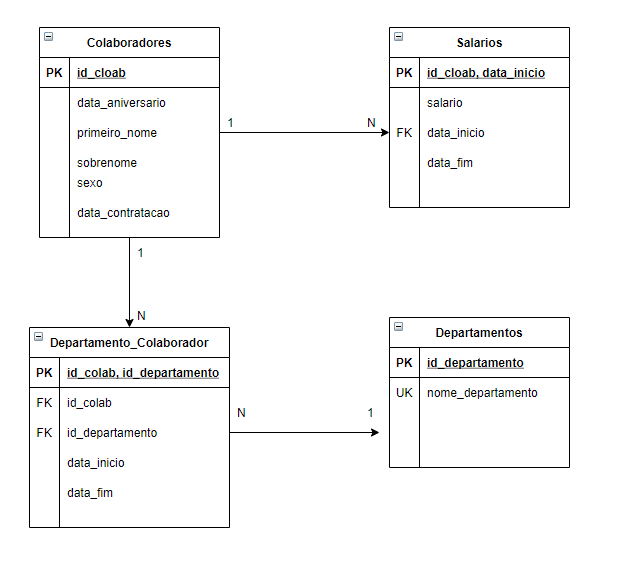

Acima temos o exemplo de uma tabela de N x N :

É necessário esta tabela para este modelo de banco de dados apresentado ?<p>
    
Quais as vantagens e desvantagens ?<p>
    
Caso seja **necessária** esta tabela de NxN, explique o porque.

Cite um exemplo é que um relacionamento de muitos para muitos se faz totalmente necessário.


## Praticando mais CRUD's e iniciando com JOINs


In [58]:
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

sql = "select * from departamento_colaborador"
cursor.execute(sql)
resultado = cursor.fetchall()

for linha in resultado:
    print("---------------------")
    print(linha)

con.commit()
con.close()
cursor.close()


---------------------
(12000, '1234', datetime.date(2021, 1, 1), datetime.date(2021, 7, 7))
---------------------
(12000, '5678', datetime.date(2021, 7, 8), None)
---------------------
(12001, '1234', datetime.date(2021, 1, 1), datetime.date(2021, 6, 7))
---------------------
(12001, '9012', datetime.date(2021, 7, 7), None)
---------------------
(12002, '5678', datetime.date(2021, 1, 1), datetime.date(2021, 4, 20))
---------------------
(12002, '9012', datetime.date(2021, 4, 21), None)
---------------------
(12003, '1234', datetime.date(2020, 4, 5), datetime.date(2021, 4, 5))
---------------------
(12003, '5678', datetime.date(2021, 4, 6), None)
---------------------
(12004, '5678', datetime.date(2021, 4, 3), datetime.date(2021, 6, 7))
---------------------
(12004, '9012', datetime.date(2021, 7, 7), None)
---------------------
(12005, '5678', datetime.date(2018, 1, 6), datetime.date(2021, 1, 20))
---------------------
(12005, '9012', datetime.date(2021, 1, 21), None)
------------------

True

In [64]:
# Criando tabela Departamento
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database, port=port)

cursor = con.cursor()

cursor.execute('''CREATE TABLE departamentos (
                    id_departamento     CHAR(4)         NOT NULL,
                    nome_departamento   VARCHAR(40)     NOT NULL,
                    PRIMARY KEY (id_departamento),
                    UNIQUE  KEY (nome_departamento)
                            );''')
con.commit()
con.close()

In [12]:
#Alimentando as Tabelas - colaboradores
con = mysql.connector.connect(user=user,
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

val =  [("12002","1992-05-12","Paulo","Miranda",'M',"2021-01-01"),
        ("12003","1989-01-04","Roberto","Almeida",'M',"2020-04-05"),
        ("12004","1988-03-12","Lucas","Vasconcellos",'M',"2021-04-03"),
        ("12005","1986-01-10","Rodrigo","Fernandes",'M',"2018-01-06"),
        ("12006","1987-05-12","Rafael","Freitas",'M',"2015-01-06"),
        ("12007","1984-05-08","Osvaldo","Miranda",'M',"2010-01-03"),
        ("12008","1973-09-10","Leopoldo","Marques",'M',"2016-03-07"),
        ("12010","1990-06-12","Carla","Miranda",'F',"2018-01-04"),
        ("12011","1991-03-12","Patricia","Lima",'F',"2018-01-04"),
        ("12012","1989-01-12","Carolina","Jesus",'F',"2018-01-04"),
        ("12013","1976-02-12","Ana","Francis",'F',"2018-01-04")]


sql = f'''INSERT INTO colaboradores(id_colab,data_aniversario,primeiro_nome,sobrenome,sexo,data_contratacao) 
          VALUES (%s, %s, %s, %s, %s, %s)'''


cursor.executemany(sql, val)
cursor.close()    
con.commit()
con.close()

In [15]:
#Alimentando as Tabelas - salarios
con = mysql.connector.connect(user=user,
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()
NULL=None


val = [("1",3500,"2018-01-04",'2019-02-06'),
      ("1",41000,"2019-02-07",NULL)]




#      ("12005",2500,"2018-01-06",'2020-01-06'),
#      ("12005",3500,"2020-01-07",NULL),
#      ("12006",3500,"2015-01-06",'2017-02-06'),
#      ("12006",4500,"2017-01-07",NULL),
#      ("12007",3500,"2010-01-03",'2015-02-06'),
#      ("12007",4500,"2015-02-07",'2019-04-06'),
#      ("12007",5500,"2019-04-07","2010-08-07"),
#      ("12007",4500,"2017-08-09",NULL),
#      ("12008",3500,"2016-03-07",'2017-02-06'),
#      ("12008",4500,"2017-02-07",NULL),
#      ("12009",3500,"2015-01-06",'2017-02-06'),
#      ("12009",4500,"2017-02-07",NULL),
#      ("12010",3500,"2018-01-04",'2020-03-07'),
#      ("12010",4700,"2020-03-08",NULL),
#      ("12011",3500,"2018-01-04",'2019-02-03'),
#      ("12011",4000,"2019-02-04",NULL),
#      ("12012",3500,"2018-01-04",'2020-02-06'),
#      ("12012",4300,"2020-02-07",NULL),
#      ("12013",3500,"2018-01-04",'2019-02-06').
#      ("12013",41000,"2019-02-07",NULL)]


sql = f'''INSERT INTO salarios(id_colab,salario,data_inicio,data_fim) 
VALUES (%s, %s, %s, %s)'''


cursor.executemany(sql, val)
cursor.close()    
con.commit()
con.close()

In [47]:
#Alimentando Tabela Departamento
con = mysql.connector.connect(user=user,
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()
NULL=None


val = [("1234","Financeiro"),
      ("5678","Logistica"),
      ("9012","contabilidade")]

sql = f'''INSERT INTO departamentos(id_departamento,nome_departamento) 
VALUES (%s, %s)'''


cursor.executemany(sql, val)
cursor.close()    
con.commit()
con.close()

In [57]:
#Alimentando Tabela Departamento Colaborador
con = mysql.connector.connect(user=user,
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()
NULL=None


val =  [("12013","5678","2018-01-04","2019-11-20"),
       ("12013","9012","2019-11-21",NULL)]

sql = f'''INSERT INTO departamento_colaborador(id_colab,id_departamento,data_inicio,data_fim) 
VALUES (%s, %s, %s, %s)'''


cursor.executemany(sql, val)
cursor.close()    
con.commit()
con.close()

In [54]:
#Checando as inserções e formatando a saida
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

sql = "select * from colaboradores where id_colab >=12008"
cursor.execute(sql)
resultado = cursor.fetchall()

con.close()
cursor.close()
for linha in resultado:
    print("---------------------")
    print("ID Colaborador:",linha[0])
    print("Data Nascimento:",linha[1])
    print("Primeiro Nome:",linha[2])
    print("Ultimo Nome:",linha[3])
    print("Sexo:",linha[4])
    print("Data Contratacao:",linha[5])

---------------------
ID Colaborador: 12008
Data Nascimento: 1973-09-10
Primeiro Nome: Leopoldo
Ultimo Nome: Marques
Sexo: M
Data Contratacao: 2016-03-07
---------------------
ID Colaborador: 12010
Data Nascimento: 1990-06-12
Primeiro Nome: Carla
Ultimo Nome: Miranda
Sexo: F
Data Contratacao: 2018-01-04
---------------------
ID Colaborador: 12011
Data Nascimento: 1991-03-12
Primeiro Nome: Patricia
Ultimo Nome: Lima
Sexo: F
Data Contratacao: 2018-01-04
---------------------
ID Colaborador: 12012
Data Nascimento: 1989-01-12
Primeiro Nome: Carolina
Ultimo Nome: Jesus
Sexo: F
Data Contratacao: 2018-01-04
---------------------
ID Colaborador: 12013
Data Nascimento: 1976-02-12
Primeiro Nome: Ana
Ultimo Nome: Francis
Sexo: F
Data Contratacao: 2018-01-04


### Where

In [17]:
#Where, Having, Count, Max, Min, Like
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

sql = "select * from colaboradores where id_colab >=12000 AND id_colab <= 12002"
cursor.execute(sql)
resultado = cursor.fetchall()

con.close()
cursor.close()
for linha in resultado:
    print("---------------------")
    print("ID Colaborador:",linha[0])
    print("Data Nascimento:",linha[1])
    print("Primeiro Nome:",linha[2])
    print("Ultimo Nome:",linha[3])
    print("Sexo:",linha[4])
    print("Data Contratacao:",linha[5])


---------------------
ID Colaborador: 12000
Data Nascimento: 1992-05-12
Primeiro Nome: Joao
Ultimo Nome: silva
Sexo: M
Data Contratacao: 2021-01-01
---------------------
ID Colaborador: 12001
Data Nascimento: 1992-05-12
Primeiro Nome: Paulo
Ultimo Nome: Miranda
Sexo: M
Data Contratacao: 2021-01-01
---------------------
ID Colaborador: 12002
Data Nascimento: 1992-05-12
Primeiro Nome: Paulo
Ultimo Nome: Miranda
Sexo: M
Data Contratacao: 2021-01-01


### Where com Between

In [18]:
#Where, Having, Count, Max, Min, Like
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

sql = "select * from colaboradores where id_colab BETWEEN 12000 and 12002"
cursor.execute(sql)
resultado = cursor.fetchall()

con.close()
cursor.close()
for linha in resultado:
    print("---------------------")
    print("ID Colaborador:",linha[0])
    print("Data Nascimento:",linha[1])
    print("Primeiro Nome:",linha[2])
    print("Ultimo Nome:",linha[3])
    print("Sexo:",linha[4])
    print("Data Contratacao:",linha[5])

---------------------
ID Colaborador: 12000
Data Nascimento: 1992-05-12
Primeiro Nome: Joao
Ultimo Nome: silva
Sexo: M
Data Contratacao: 2021-01-01
---------------------
ID Colaborador: 12001
Data Nascimento: 1992-05-12
Primeiro Nome: Paulo
Ultimo Nome: Miranda
Sexo: M
Data Contratacao: 2021-01-01
---------------------
ID Colaborador: 12002
Data Nascimento: 1992-05-12
Primeiro Nome: Paulo
Ultimo Nome: Miranda
Sexo: M
Data Contratacao: 2021-01-01


### MAX e MIN


In [33]:
#Max - Colaborador contratado recentemente
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

sql = '''SELECT  MAX(data_contratacao) AS data_contratacao
    FROM colaboradores'''
cursor.execute(sql)
resultado = cursor.fetchall()

con.close()
cursor.close()
for linha in resultado:
    print("---------------------")    
    print("Data Contratação Colaborador Mais recente:",linha[0])
    #print("Data Nascimento:",linha[1])
    #print("Primeiro Nome:",linha[2])
    #print("Ultimo Nome:",linha[3])
    #print("Sexo:",linha[4])
    #print("Data Contratacao:",linha[5])

---------------------
Data Contratação Colaborador Mais recente: 2021-04-03


In [34]:
#Max - Colaborador contratado antigo
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

sql = '''SELECT  MIN(data_contratacao) AS data_contratacao
    FROM colaboradores'''
cursor.execute(sql)
resultado = cursor.fetchall()

con.close()
cursor.close()
for linha in resultado:
    print("---------------------")    
    print("Data Contratação Colaborador Mais antigo:",linha[0])
    #print("Data Nascimento:",linha[1])
    #print("Primeiro Nome:",linha[2])
    #print("Ultimo Nome:",linha[3])
    #print("Sexo:",linha[4])
    #print("Data Contratacao:",linha[5])

---------------------
Data Contratação Colaborador Mais antigo: 1985-02-03


### COUNT e GROUP BY

In [44]:
# Colaboradores mais alterações de Salario
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

sql = '''SELECT id_colab, COUNT(id_colab) from salarios 
         GROUP BY id_colab
         ORDER BY COUNT(id_colab) DESC LIMIT 1;
            '''
cursor.execute(sql)
resultado = cursor.fetchall()

con.close()
cursor.close()
for linha in resultado:
    print("---------------------")    
    print("ID Colaborador com mais alterações de salario",linha[0])
    #print("Data Nascimento:",linha[1])
    #print("Primeiro Nome:",linha[2])
    #print("Ultimo Nome:",linha[3])
    #print("Sexo:",linha[4])
    #print("Data Contratacao:",linha[5])

---------------------
Colaborador com mais alterações de salario 12007


In [85]:
#Having
# Obtendo numero de colaboradores por departamento
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

sql = '''SELECT id_departamento, COUNT(*) from departamento_colaborador 
         WHERE data_fim is NULL
         GROUP By id_departamento 
         HAVING COUNT(*) >= 2
         
            '''
cursor.execute(sql)
resultado = cursor.fetchall()

con.close()
cursor.close()
for linha in resultado:
    print("---------------------")    
    print(linha)
    #print("Data Nascimento:",linha[1])
    #print("Primeiro Nome:",linha[2])
    #print("Ultimo Nome:",linha[3])
    #print("Sexo:",linha[4])
    #print("Data Contratacao:",linha[5])

---------------------
('5678', 2)
---------------------
('9012', 11)


### Like

In [87]:
#Having
# Obtendo numero de colaboradores por departamento
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

sql = '''SELECT * FROM departamentos where nome_departamento like 'finan%'
         
            '''
cursor.execute(sql)
resultado = cursor.fetchall()

con.close()
cursor.close()
for linha in resultado:
    print("---------------------")    
    print(linha)
    #print("Data Nascimento:",linha[1])
    #print("Primeiro Nome:",linha[2])
    #print("Ultimo Nome:",linha[3])
    #print("Sexo:",linha[4])
    #print("Data Contratacao:",linha[5])#Executando Joins

---------------------
('1234', 'Financeiro')


### utilizando o pandas para leitura


In [88]:
con = mysql.connector.connect(user=user,
                              password=password,
                              host=host,
                              database=database)
cursor = con.cursor()

#usando o read_sql_query
df = pd.read_sql_query("SELECT * from colaboradores", con)

con.close()

In [89]:
df.head()

,id_colab,data_aniversario,primeiro_nome,sobrenome,sexo,data_contratacao
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


### Utilizando Metodos para evitar codigo duplicado

In [94]:
def select_table(user=user,
                password=password,
                host=host,
                database=database,
                table_name = 'colaboradores'):
    
    con = mysql.connector.connect(user=user,
                                  password=password,
                                  host=host,
                                  database=database)
    cursor = con.cursor()
    sql = "SELECT * FROM {} where id_colab >=12000".format(table_name)
    
    cursor.execute(sql)
    resultado = cursor.fetchall()
    con.close()
    
    return resultado, cursor

In [95]:
resultado, cursor = select_table()

In [96]:
resultado

[(12000,
  datetime.date(1992, 5, 12),
  'Joao',
  'silva',
  'M',
  datetime.date(2021, 1, 1)),
 (12001,
  datetime.date(1992, 5, 12),
  'Paulo',
  'Miranda',
  'M',
  datetime.date(2021, 1, 1)),
 (12002,
  datetime.date(1992, 5, 12),
  'Paulo',
  'Miranda',
  'M',
  datetime.date(2021, 1, 1)),
 (12003,
  datetime.date(1989, 1, 4),
  'Roberto',
  'Almeida',
  'M',
  datetime.date(2020, 4, 5)),
 (12004,
  datetime.date(1988, 3, 12),
  'Lucas',
  'Vasconcellos',
  'M',
  datetime.date(2021, 4, 3)),
 (12005,
  datetime.date(1986, 1, 10),
  'Rodrigo',
  'Fernandes',
  'M',
  datetime.date(2018, 1, 6)),
 (12006,
  datetime.date(1987, 5, 12),
  'Rafael',
  'Freitas',
  'M',
  datetime.date(2015, 1, 6)),
 (12007,
  datetime.date(1984, 5, 8),
  'Osvaldo',
  'Miranda',
  'M',
  datetime.date(2010, 1, 3)),
 (12008,
  datetime.date(1973, 9, 10),
  'Leopoldo',
  'Marques',
  'M',
  datetime.date(2016, 3, 7)),
 (12010,
  datetime.date(1990, 6, 12),
  'Carla',
  'Miranda',
  'F',
  datetime.date(20

In [97]:
cursor.description

[('id_colab', 3, None, None, None, None, 0, 20483, 63),
 ('data_aniversario', 10, None, None, None, None, 0, 4225, 63),
 ('primeiro_nome', 253, None, None, None, None, 0, 4097, 45),
 ('sobrenome', 253, None, None, None, None, 0, 4097, 45),
 ('sexo', 254, None, None, None, None, 0, 4353, 45),
 ('data_contratacao', 10, None, None, None, None, 0, 4225, 63)]

### Joins


In [110]:
#Inner Join
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

sql = ''' SELECT 
                 colaboradores.id_colab,
                 colaboradores.primeiro_nome,
                 departamento_colaborador.id_departamento,
                 departamentos.nome_departamento
                 
          FROM colaboradores
          
          INNER JOIN departamento_colaborador
          ON colaboradores.id_colab = departamento_colaborador.id_colab
          
          INNER JOIN departamentos
          ON departamento_colaborador.id_departamento = departamentos.id_departamento
          
          Where departamento_colaborador.data_fim is not NULL
                             
          ORDER BY colaboradores.primeiro_nome
         
            '''
cursor.execute(sql)
resultado = cursor.fetchall()

con.close()
cursor.close()
for linha in resultado:
    print("---------------------")    
    print(linha)
    #print("Data Nascimento:",linha[1])
    #print("Primeiro Nome:",linha[2])
    #print("Ultimo Nome:",linha[3])
    #print("Sexo:",linha[4])
    #print("Data Contratacao:",linha[5])#Executando Joins

---------------------
(12013, 'Ana', '5678', 'Logistica')
---------------------
(12010, 'Carla', '5678', 'Logistica')
---------------------
(12012, 'Carolina', '5678', 'Logistica')
---------------------
(12000, 'Joao', '1234', 'Financeiro')
---------------------
(12008, 'Leopoldo', '5678', 'Logistica')
---------------------
(12004, 'Lucas', '5678', 'Logistica')
---------------------
(12007, 'Osvaldo', '1234', 'Financeiro')
---------------------
(12011, 'Patricia', '1234', 'Financeiro')
---------------------
(12001, 'Paulo', '1234', 'Financeiro')
---------------------
(12002, 'Paulo', '5678', 'Logistica')
---------------------
(12006, 'Rafael', '5678', 'Logistica')
---------------------
(12003, 'Roberto', '1234', 'Financeiro')
---------------------
(12005, 'Rodrigo', '5678', 'Logistica')


In [122]:
#Inner Join
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

sql = ''' SELECT count(*),
                 departamento_colaborador.id_departamento                 
                 
          FROM colaboradores
          
          INNER JOIN departamento_colaborador
          ON colaboradores.id_colab = departamento_colaborador.id_colab
          
          Where departamento_colaborador.data_fim is  NULL
            
          group by departamento_colaborador.id_departamento 
        
          
         
            '''
cursor.execute(sql)
resultado = cursor.fetchall()

con.close()
cursor.close()
for linha in resultado:
    print("---------------------")    
    print(linha)
    #print("Data Nascimento:",linha[1])
    #print("Primeiro Nome:",linha[2])
    #print("Ultimo Nome:",linha[3])
    #print("Sexo:",linha[4])
    #print("Data Contratacao:",linha[5])#Executando Joins

---------------------
(2, '5678')
---------------------
(11, '9012')


In [123]:
#Inner Join com Count e Group by
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

sql = ''' SELECT count(*),
                
           departamentos.nome_departamento
                 
          FROM colaboradores
          
          INNER JOIN departamento_colaborador
          ON colaboradores.id_colab = departamento_colaborador.id_colab
          
          INNER JOIN departamentos
          ON departamento_colaborador.id_departamento = departamentos.id_departamento
          
          Where departamento_colaborador.data_fim is  NULL
            
          group by departamento_colaborador.id_departamento 
        
          
         
            '''
cursor.execute(sql)
resultado = cursor.fetchall()

con.close()
cursor.close()
for linha in resultado:
    print("---------------------")    
    print(linha)
    #print("Data Nascimento:",linha[1])
    #print("Primeiro Nome:",linha[2])
    #print("Ultimo Nome:",linha[3])
    #print("Sexo:",linha[4])
    #print("Data Contratacao:",linha[5])#Executando Joins

---------------------
(2, 'Logistica')
---------------------
(11, 'contabilidade')


In [126]:
#LEFT JOIN
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)

cursor = con.cursor()

sql = '''SELECT colaboradores.id_colab, departamento_colaborador.id_departamento
FROM colaboradores
LEFT JOIN departamento_colaborador
ON colaboradores.id_colab = departamento_colaborador.id_colab;
        
          
         
            '''
cursor.execute(sql)
resultado = cursor.fetchall()

con.close()
cursor.close()
for linha in resultado:
    print("---------------------")    
    print(linha)
    #print("Data Nascimento:",linha[1])
    #print("Primeiro Nome:",linha[2])
    #print("Ultimo Nome:",linha[3])
    #print("Sexo:",linha[4])
    #print("Data Contratacao:",linha[5])#Executando Joins

---------------------
(10001, None)
---------------------
(10002, None)
---------------------
(10003, None)
---------------------
(10004, None)
---------------------
(10005, None)
---------------------
(10006, None)
---------------------
(10007, None)
---------------------
(10008, None)
---------------------
(10009, None)
---------------------
(10010, None)
---------------------
(10011, None)
---------------------
(10012, None)
---------------------
(10013, None)
---------------------
(10014, None)
---------------------
(10015, None)
---------------------
(10016, None)
---------------------
(10017, None)
---------------------
(10018, None)
---------------------
(10019, None)
---------------------
(10020, None)
---------------------
(10021, None)
---------------------
(10022, None)
---------------------
(10023, None)
---------------------
(10024, None)
---------------------
(10025, None)
---------------------
(10026, None)
---------------------
(10027, None)
---------------------
(10028

(10792, None)
---------------------
(10793, None)
---------------------
(10794, None)
---------------------
(10795, None)
---------------------
(10796, None)
---------------------
(10797, None)
---------------------
(10798, None)
---------------------
(10799, None)
---------------------
(10800, None)
---------------------
(10801, None)
---------------------
(10802, None)
---------------------
(10803, None)
---------------------
(10804, None)
---------------------
(10805, None)
---------------------
(10806, None)
---------------------
(10807, None)
---------------------
(10808, None)
---------------------
(10809, None)
---------------------
(10810, None)
---------------------
(10811, None)
---------------------
(10812, None)
---------------------
(10813, None)
---------------------
(10814, None)
---------------------
(10815, None)
---------------------
(10816, None)
---------------------
(10817, None)
---------------------
(10818, None)
---------------------
(10819, None)
--------------

### POSTGRES


In [129]:
!pip install psycopg2

  Using cached https://files.pythonhosted.org/packages/75/4a/3d5781fa2669851b756eab27d94c1c0d90bbdb2a40050dff0a993daf2c2c/psycopg2-2.9.1-cp37-cp37m-win_amd64.whl


In [135]:
import os
import psycopg2
import psycopg2.extras
import sys
import pandas as pd

def connect_db():
    db_url='ec2-52-21-252-142.compute-1.amazonaws.com'
    db_name='deimqn280trds9'
    db_user='ghlimogzjyppfi'
    db_password='dd074b7874cb6aa8f9724b529d3c5a3b59307c286a731db8a5719aefe8250dde'
    
    conn = psycopg2.connect(host=db_url, port = 5432, database=db_name, user=db_user, password=db_password)
    return conn

def execute_query(db, query_string):
    # Create a cursor object
    cur = db.cursor(cursor_factory=psycopg2.extras.DictCursor)
    
    # A sample query of all data from the "vendors" table in the "suppliers" database
    cur.execute(query_string)
    return cur

In [137]:
query = '''
select film.title, category.name as category_name from film 
left join film_category ON film.film_id = film_category.film_id 
left join category ON film_category.category_id = category.category_id
'''

db = connect_db()

cur = execute_query(db, query)

db = connect_db()

df = pd.read_sql_query(query, db)

cur.close()
db.close()
df

,title,category_name
0,Academy Dinosaur,Documentary
1,Ace Goldfinger,Horror
2,Adaptation Holes,Documentary
3,Affair Prejudice,Horror
4,African Egg,Family
5,Agent Truman,Foreign
6,Airplane Sierra,Comedy
7,Airport Pollock,Horror
8,Alabama Devil,Horror
9,Aladdin Calendar,Sports
